<a href="https://colab.research.google.com/github/itsalexom/itsalexom/blob/main/Grupo3_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA)

Integrantes:
Jose Junior Lalupu Iman
Alexander Ortega Mego
MAria Fernanda Llerena Gamero

In [13]:
#Cargamos nuestra data bd_riesgo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bd_riesgo = pd.read_excel("/content/drive/MyDrive/1 Bootcamp_Python_DSRP/Carpeta sin título/bbdd_riesgo.xlsx")
bd_riesgo.head(5)

,ID,MORA60,ATRASO,TIPOCASA,EDAD,FECHA_EMPLEO,TC,AHORRO,INGRESO,LINEA_TC,SALDO_DEUDOR,SCORE,ABONO_PAGO,DEPARTAMENTO,RIESGO_SBS,EDUCACION
0,1,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,2,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,3,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL
3,4,0,0,FAMILIAR,36,2003-07-01,20,12,2700.0,0.00,0.00,187,12,Ancash,0,TECNICO
4,5,0,0,FAMILIAR,46,2006-11-01,0,1,3100.0,2000.00,11010.65,189,0,Lima,0,TECNICO


In [15]:
bd_riesgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            5000 non-null   int64         
 1   MORA60        5000 non-null   int64         
 2   ATRASO        5000 non-null   int64         
 3   TIPOCASA      5000 non-null   object        
 4   EDAD          5000 non-null   int64         
 5   FECHA_EMPLEO  5000 non-null   datetime64[ns]
 6   TC            5000 non-null   int64         
 7   AHORRO        5000 non-null   int64         
 8   INGRESO       5000 non-null   float64       
 9   LINEA_TC      5000 non-null   float64       
 10  SALDO_DEUDOR  5000 non-null   float64       
 11  SCORE         5000 non-null   int64         
 12  ABONO_PAGO    5000 non-null   int64         
 13  DEPARTAMENTO  5000 non-null   object        
 14  RIESGO_SBS    5000 non-null   int64         
 15  EDUCACION     5000 non-null   object  

## Nivel Básico

### 1. Descripción General de los Datos

#### ¿Cuántas observaciones y variables contiene el conjunto de datos?

In [16]:
bd_riesgo.shape

(5000, 16)

#### ¿Qué tipos de variables (numéricas, categóricas) se incluyen en el conjunto de datos y cómo se distribuyen?

In [17]:
bd_riesgo.dtypes

ID                       int64
MORA60                   int64
ATRASO                   int64
TIPOCASA                object
EDAD                     int64
FECHA_EMPLEO    datetime64[ns]
TC                       int64
AHORRO                   int64
INGRESO                float64
LINEA_TC               float64
SALDO_DEUDOR           float64
SCORE                    int64
ABONO_PAGO               int64
DEPARTAMENTO            object
RIESGO_SBS               int64
EDUCACION               object
dtype: object

### 2. Estadísticas Descriptivas

#### ¿Cuál es la edad promedio de los clientes en el conjunto de datos?

In [18]:
bd_riesgo['EDAD'].mean()

36.4294

#### Proporcione las estadísticas descriptivas (media, mediana, desviación estándar, mínimo, máximo) para las variables numéricas.

In [19]:
bd_riesgo.describe()

,ID,MORA60,ATRASO,EDAD,TC,AHORRO,INGRESO,LINEA_TC,SALDO_DEUDOR,SCORE,ABONO_PAGO,RIESGO_SBS
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,0.700000,4.48080,36.429400,25.386000,10.571000,4373.572006,10236.736330,5732.438204,196.762400,7.90080,0.563600
std,1443.520003,0.458303,13.94524,9.787225,32.014265,3.396125,5393.520235,19853.871452,10869.692111,19.416316,5.27755,0.902728
min,1.000000,0.000000,0.00000,20.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.00000,0.000000
25%,1250.750000,0.000000,0.00000,29.000000,0.000000,12.000000,1400.000000,389.365000,283.605000,182.000000,0.00000,0.000000
50%,2500.500000,1.000000,0.00000,34.000000,12.000000,12.000000,2400.000000,2915.955000,2077.105000,197.000000,12.00000,0.000000
75%,3750.250000,1.000000,2.00000,42.000000,39.000000,12.000000,4900.000000,9763.387500,5384.220000,212.000000,12.00000,1.000000
max,5000.000000,1.000000,245.00000,85.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,12.00000,4.000000


In [20]:
bd_riesgo.describe(include=object)

,TIPOCASA,DEPARTAMENTO,EDUCACION
count,5000,5000,5000
unique,4,25,5
top,FAMILIAR,Lima,PROFESIONAL
freq,3471,2948,2666


In [21]:
bd_riesgo.describe(include=[np.number])

,ID,MORA60,ATRASO,EDAD,TC,AHORRO,INGRESO,LINEA_TC,SALDO_DEUDOR,SCORE,ABONO_PAGO,RIESGO_SBS
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,0.700000,4.48080,36.429400,25.386000,10.571000,4373.572006,10236.736330,5732.438204,196.762400,7.90080,0.563600
std,1443.520003,0.458303,13.94524,9.787225,32.014265,3.396125,5393.520235,19853.871452,10869.692111,19.416316,5.27755,0.902728
min,1.000000,0.000000,0.00000,20.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.00000,0.000000
25%,1250.750000,0.000000,0.00000,29.000000,0.000000,12.000000,1400.000000,389.365000,283.605000,182.000000,0.00000,0.000000
50%,2500.500000,1.000000,0.00000,34.000000,12.000000,12.000000,2400.000000,2915.955000,2077.105000,197.000000,12.00000,0.000000
75%,3750.250000,1.000000,2.00000,42.000000,39.000000,12.000000,4900.000000,9763.387500,5384.220000,212.000000,12.00000,1.000000
max,5000.000000,1.000000,245.00000,85.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,12.00000,4.000000


#### Muestre estas medidas de tendencia central en un BoxPlot para cada variable mencionada.

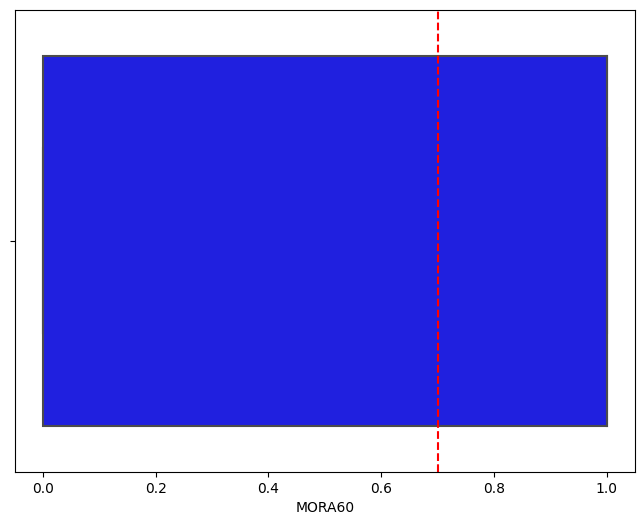

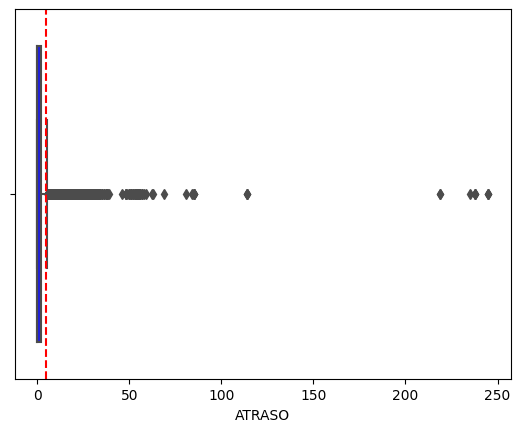

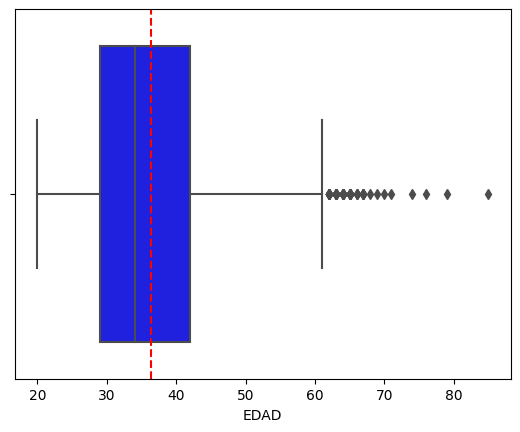

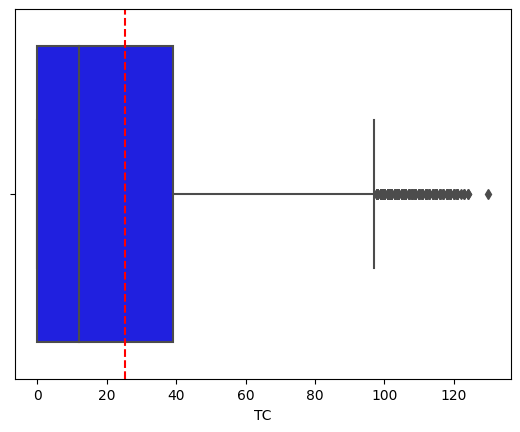

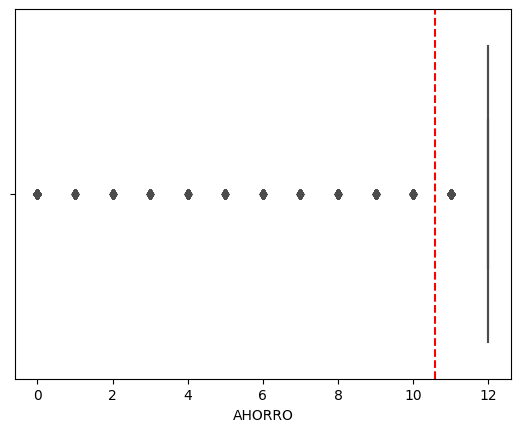

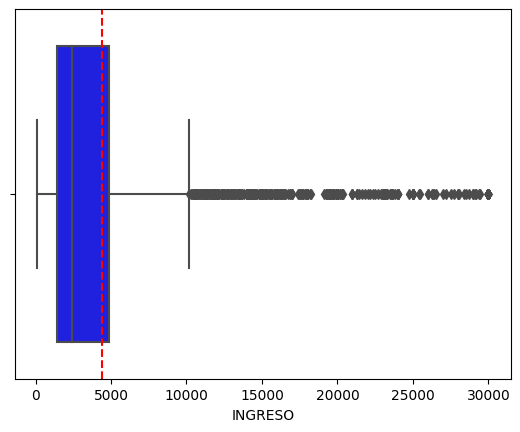

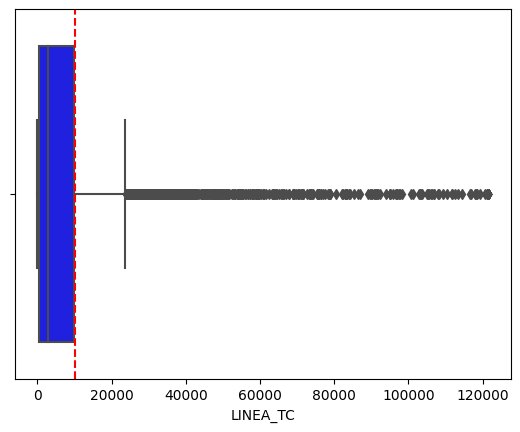

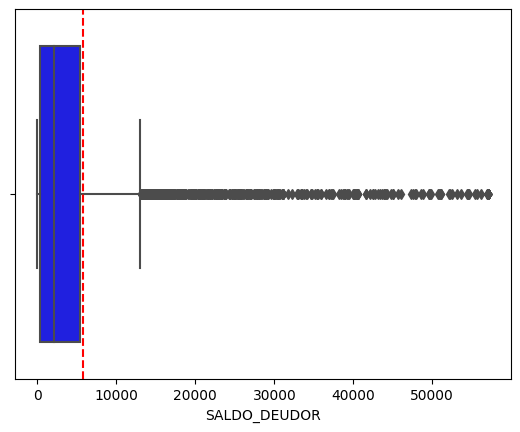

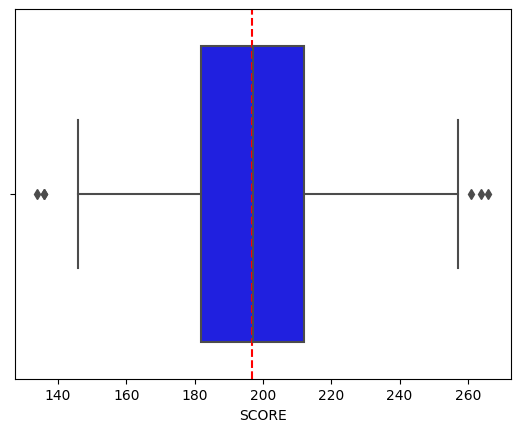

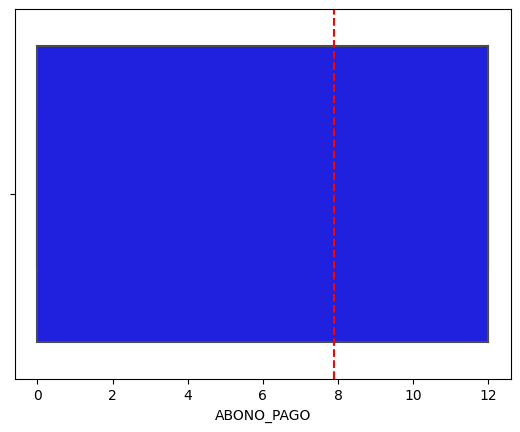

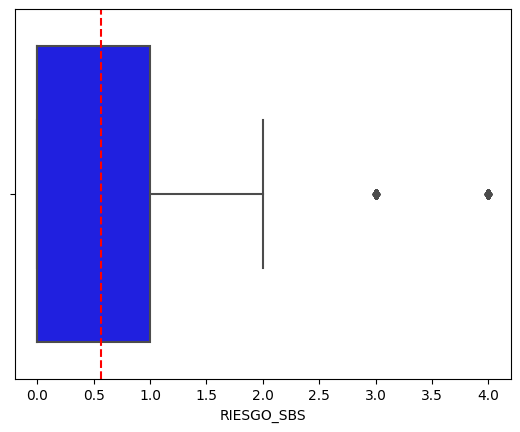

In [22]:
rs = bd_riesgo

plt.figure(figsize=(8, 6))
# CREAMOS FUNCION PARA
def boxplot_bd(bd_riesgo,column):
    sns.boxplot(
         data=rs,
         x=column,
         color='Blue'
    )

    plt.axvline(# Línea horizontal para la media
        x=rs[column].mean(),
        color='red',
        linestyle='--',
        label='Media'
    )

    plt.show()
    print("\n")

boxplot_bd(rs, 'MORA60')
boxplot_bd(rs, 'ATRASO')
boxplot_bd(rs, 'EDAD')
boxplot_bd(rs, 'TC')
boxplot_bd(rs, 'AHORRO')
boxplot_bd(rs, 'INGRESO')
boxplot_bd(rs, 'LINEA_TC')
boxplot_bd(rs, 'SALDO_DEUDOR')
boxplot_bd(rs, 'SCORE')
boxplot_bd(rs, 'ABONO_PAGO')
boxplot_bd(rs, 'RIESGO_SBS')



#### Proporcione estadísticas para las variables categóricas (texto).

In [ ]:
bd_riesgo.describe(include=np.object_)

,TIPOCASA,DEPARTAMENTO,EDUCACION
count,5000,5000,5000
unique,4,25,5
top,FAMILIAR,Lima,PROFESIONAL
freq,3471,2948,2666


## Nivel Intermedio

### 3. Análisis de Valores Faltantes


#### ¿Hay alguna variable con valores faltantes en el conjunto de datos?

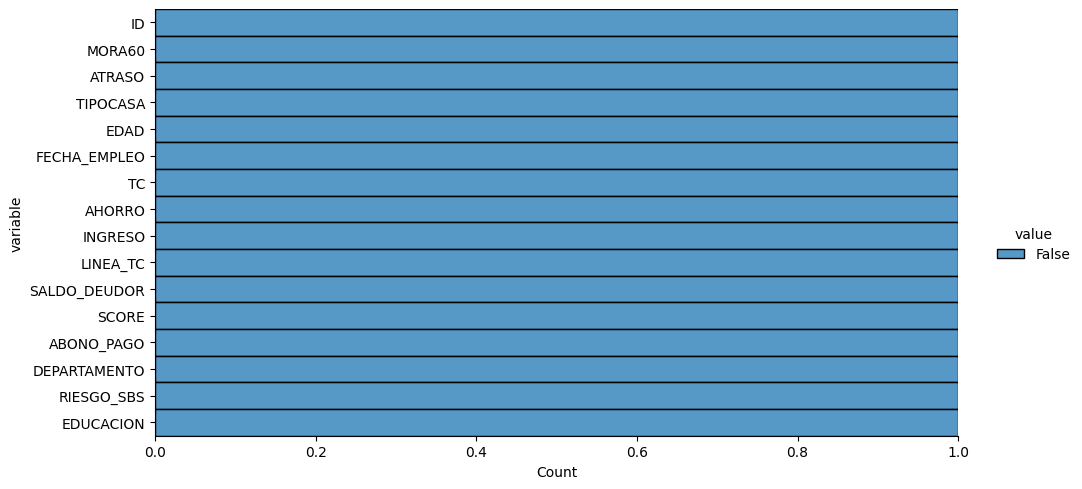

In [23]:
rs = bd_riesgo.isnull().melt()

sns.displot(data=rs,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2)
plt.show()

### 4. Visualización de Datos

#### Genere un gráfico de barras para todas las variables numéricas.

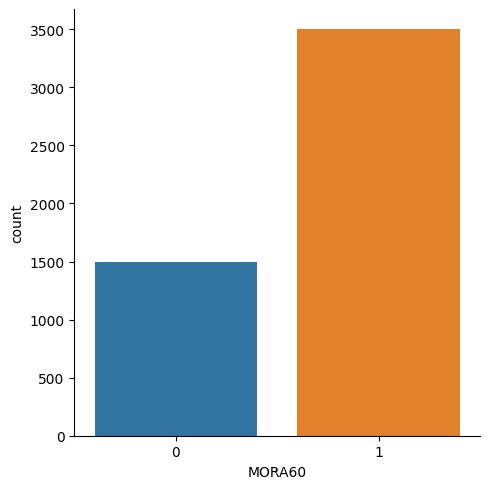

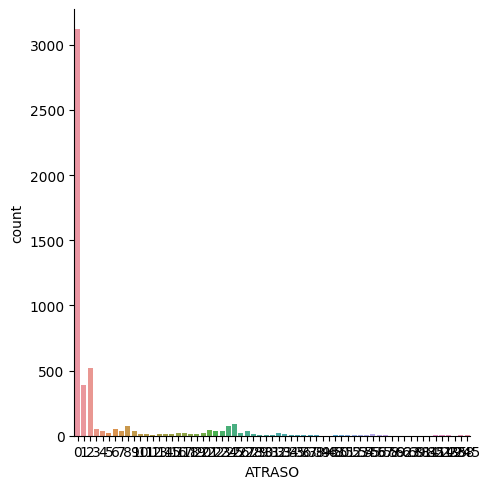

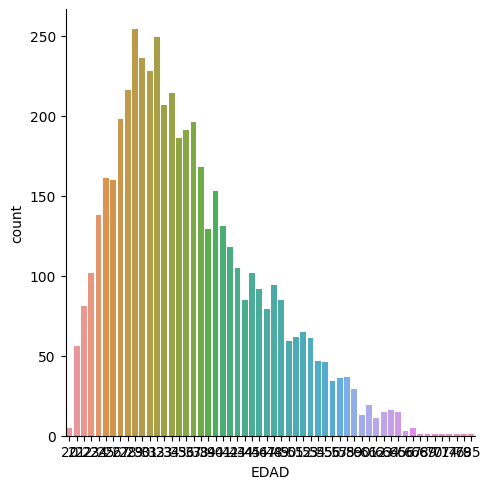

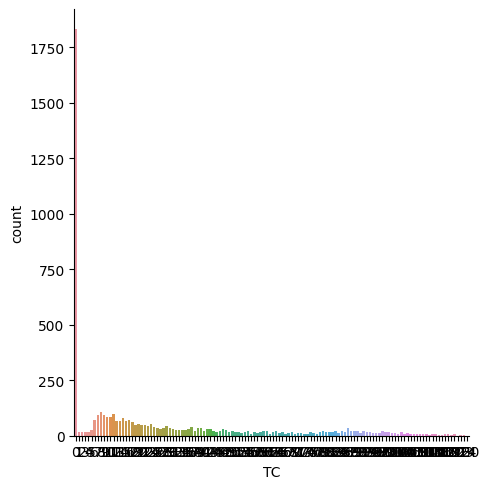

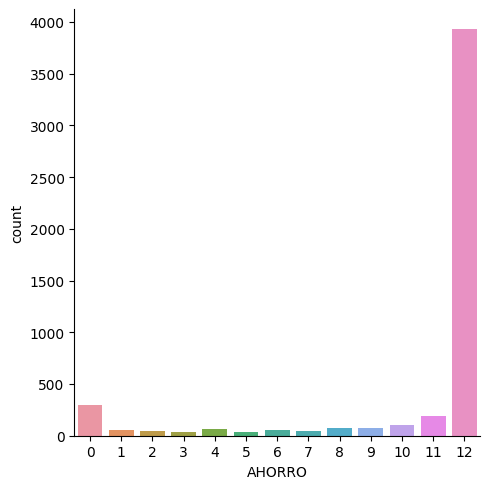

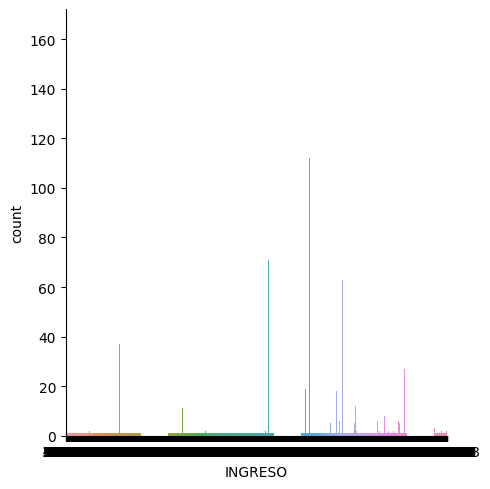

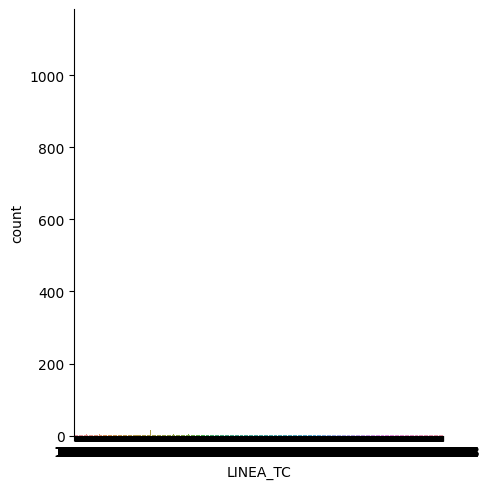

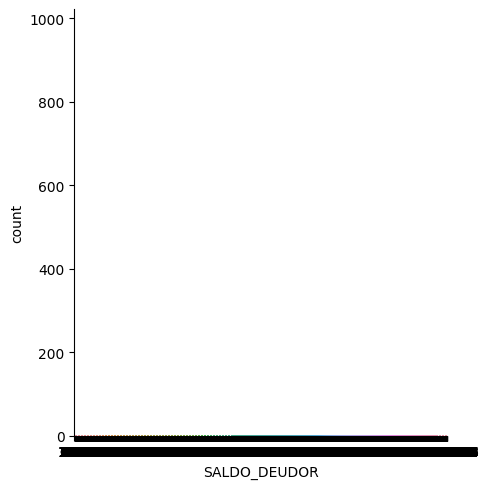

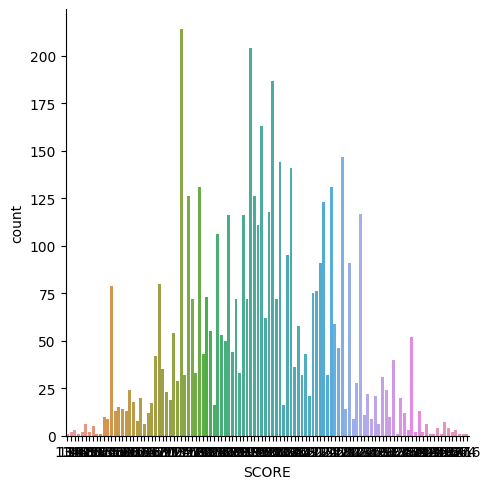

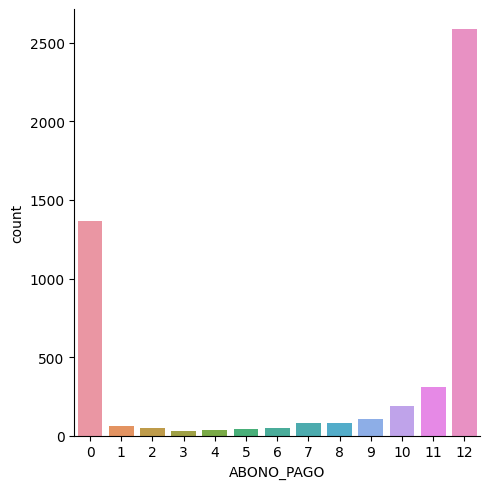

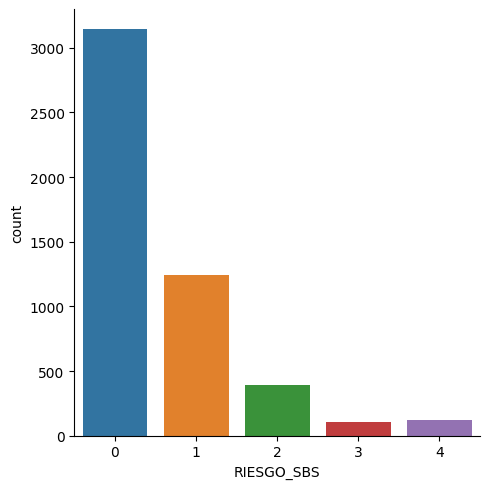

In [25]:
rs = bd_riesgo

def cotplot(bd_riesgo,column):
  sns.catplot(
      data=rs,
      x=column,
      kind='count'
  )
  plt.show()

cotplot(rs, 'MORA60')
cotplot(rs, 'ATRASO')
cotplot(rs, 'EDAD')
cotplot(rs, 'TC')
cotplot(rs, 'AHORRO')
cotplot(rs, 'INGRESO')
cotplot(rs, 'LINEA_TC')
cotplot(rs, 'SALDO_DEUDOR')
cotplot(rs, 'SCORE')
cotplot(rs, 'ABONO_PAGO')
cotplot(rs, 'RIESGO_SBS')

#### Genere graficas adicionales si considera para describir lo que esta observando en la base de datos.

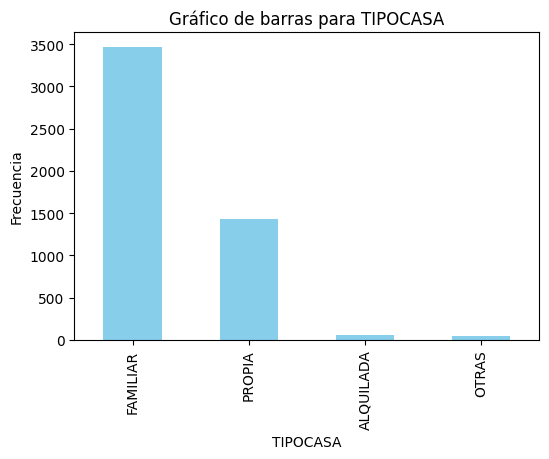

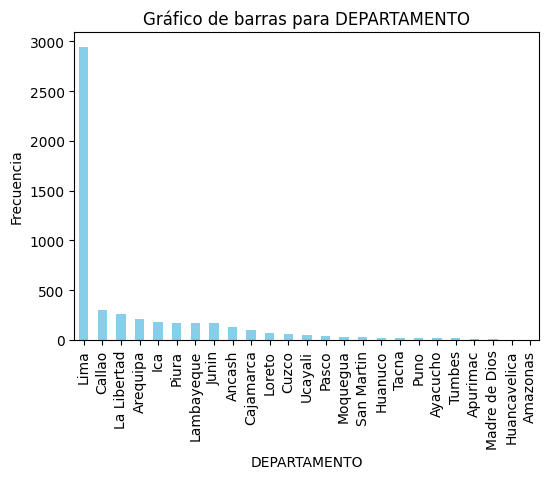

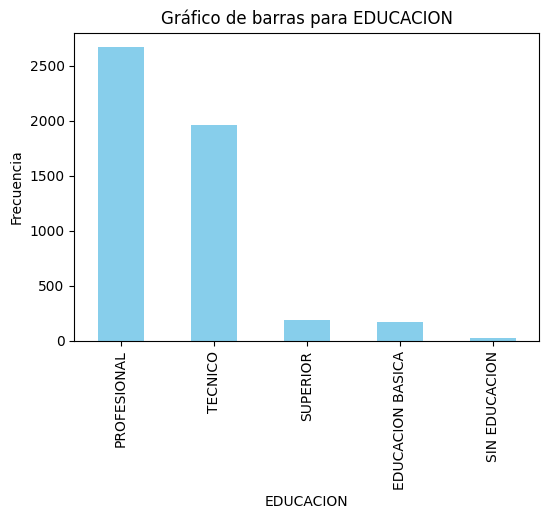

In [28]:
rs = bd_riesgo

# Hacemos un for para generar los gráficos de barras por cada variable categórica
for column in rs.select_dtypes(include='object'):
    plt.figure(figsize=(6, 4))
    rs[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Gráfico de barras para {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()